 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [65]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [66]:
# Reading whale returns
whale_returns = '../Instructions/Resources/whale_returns.csv'
whale_returns_df = pd.read_csv(whale_returns)

In [67]:
# Count nulls
null_count = whale_returns_df.isnull().sum()

In [68]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [69]:
# Reading algorithmic returns
algo_returns = '../Instructions/Resources/algo_returns.csv'
algo_returns_df = pd.read_csv(algo_returns)

In [70]:
# Count nulls
null_count = algo_returns_df.isnull().sum()

In [71]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [72]:
# Reading S&P 500 Closing Prices
sp500_history = '../Instructions/Resources/sp500_history.csv'
sp500_history_df = pd.read_csv(sp500_history)

In [73]:
# Check Data Types
print(sp500_history_df.dtypes)

Date     object
Close    object
dtype: object


In [74]:
# Fix Data Types
sp500_history_df['Close'] = pd.to_numeric(sp500_history_df['Close'], errors='coerce')
print(sp500_history_df.dtypes)

Date      object
Close    float64
dtype: object


In [75]:
# Calculate Daily Returns
sp500_history_df['Daily Returns'] = sp500_history_df['Close'].pct_change()

C:\Users\vicky\AppData\Local\Temp\ipykernel_5924\2594081831.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  sp500_history_df['Daily Returns'] = sp500_history_df['Close'].pct_change()


In [76]:
# Drop nulls
sp500_history_df.dropna(inplace=True)

In [77]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns={'Close': 'S&P 500 Close'}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [78]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis=1)
print("Combined DataFrame with Returns:")
print(combined_returns_df.head())

Combined DataFrame with Returns:
         Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   
3  2015-03-05                   0.004016            0.004076   
4  2015-03-06                  -0.007905           -0.003574   
5  2015-03-09                   0.000582            0.004225   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC Date  Algo 1  Algo 2  \
1                    -0.000496               -0.006569  NaN     NaN     NaN   
2                    -0.002534                0.004213  NaN     NaN     NaN   
3                     0.002355                0.006726  NaN     NaN     NaN   
4                    -0.008481               -0.013098  NaN     NaN     NaN   
5                     0.005843               -0.001652  NaN     NaN     NaN   

  Date  S&P 500 Close  Daily Returns  
1  NaN            NaN            NaN  
2  NaN            NaN        

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

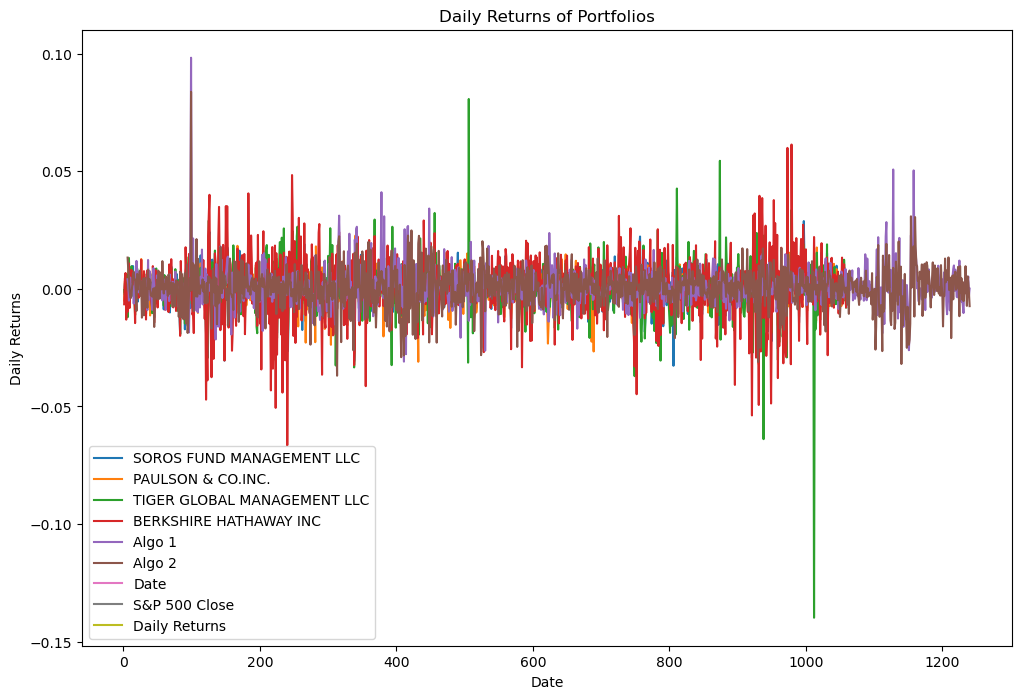

In [79]:
# Plot daily returns of all portfolios
title = 'Daily Returns of Portfolios'
combined_returns_df.plot(figsize=(12, 8))
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()


#### Calculate and Plot cumulative returns.

C:\Users\vicky\AppData\Local\Temp\ipykernel_5924\1402963493.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  daily_returns = combined_returns_df.drop('Date', axis=1).pct_change()
C:\Users\vicky\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


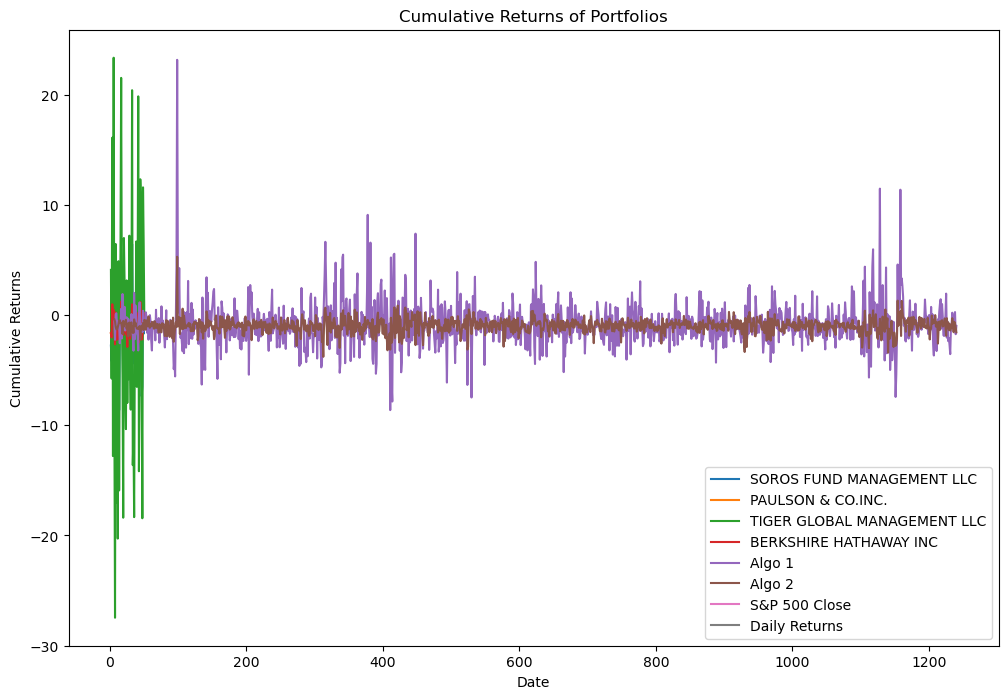

In [80]:
# Calculate daily returns
daily_returns = combined_returns_df.drop('Date', axis=1).pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1


# Plot cumulative returns
title = 'Cumulative Returns of Portfolios'
cumulative_returns.plot(figsize=(12, 8))
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


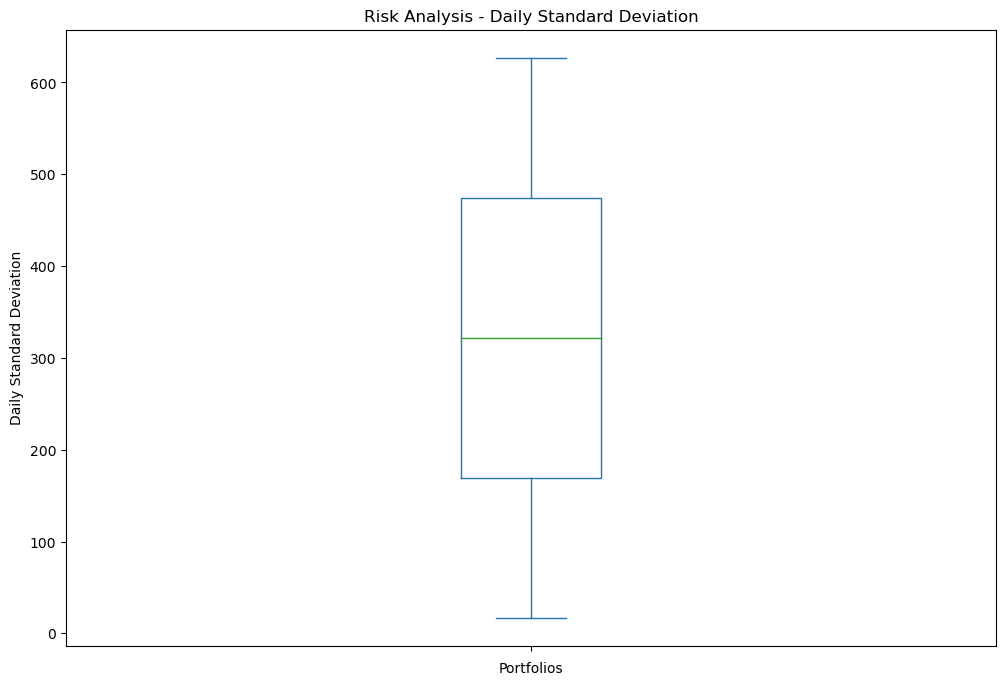

In [81]:
# Box plot to visually show risk

title = 'Risk Analysis - Daily Standard Deviation'
daily_std = daily_std.plot(kind='box', figsize=(12,8), title=title)
plt.xlabel('Portfolios')
plt.ylabel('Daily Standard Deviation')
plt.show()

### Calculate Standard Deviations

In [82]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.drop('Daily Returns', axis=1).std()

### Determine which portfolios are riskier than the S&P 500

In [83]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = daily_returns['Daily Returns'].std()

# Determine which portfolios are riskier than the S&P 500
risk_portfolios = daily_std[daily_std > sp500_daily_std]

### Calculate the Annualized Standard Deviation

In [84]:
# Calculate the annualized standard deviation (252 trading days)
sp500_daily_std = combined_returns_df['Daily Returns'].std()

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 



### Calculate and plot rolling `std` for all portfolios with 21-day window

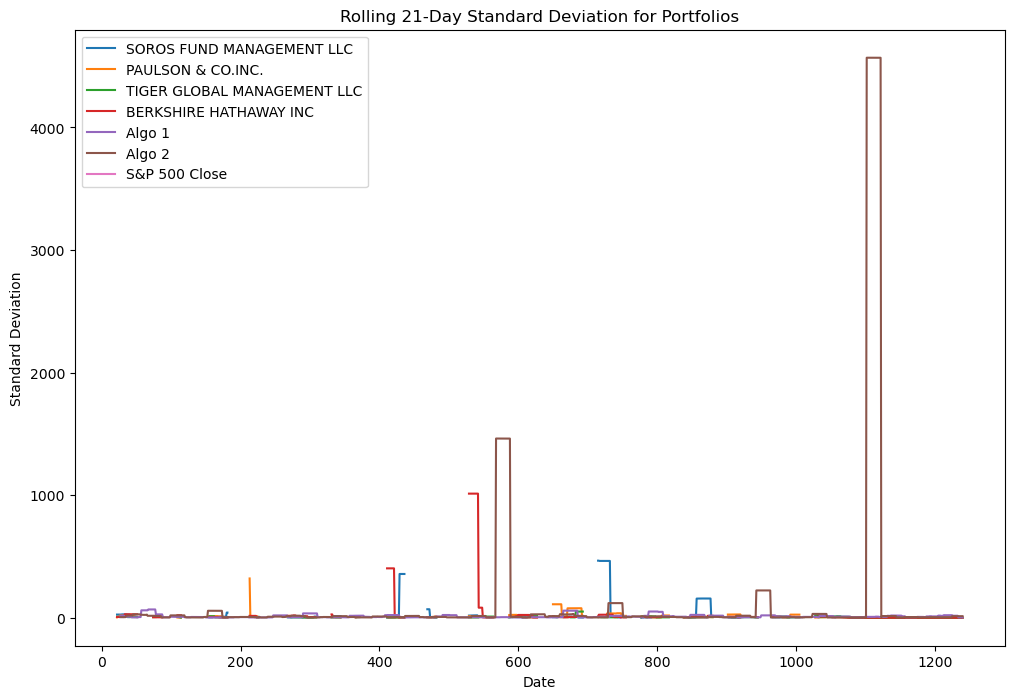

In [85]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.drop('Daily Returns', axis=1).rolling(window=21).std()

# Plot the rolling standard deviation
title = 'Rolling 21-Day Standard Deviation for Portfolios'
rolling_std.plot(figsize=(12, 8), title=title)
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()
    

### Calculate and plot the correlation

In [86]:
# Calculate the correlation
correlation_matrix = combined_returns_df.drop('Date', axis=1).corr()
# Display de correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.700181   
PAULSON & CO.INC.                             0.700181            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561745            0.435333   
BERKSHIRE HATHAWAY INC                        0.754308            0.545802   
Algo 1                                       -0.013205           -0.030506   
Algo 2                                       -0.003091           -0.026532   
S&P 500 Close                                      NaN                 NaN   
Daily Returns                                      NaN                 NaN   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561745   
PAULSON & CO.INC.                               0.435333   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC               

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

TypeError: unhashable type: 'numpy.ndarray'

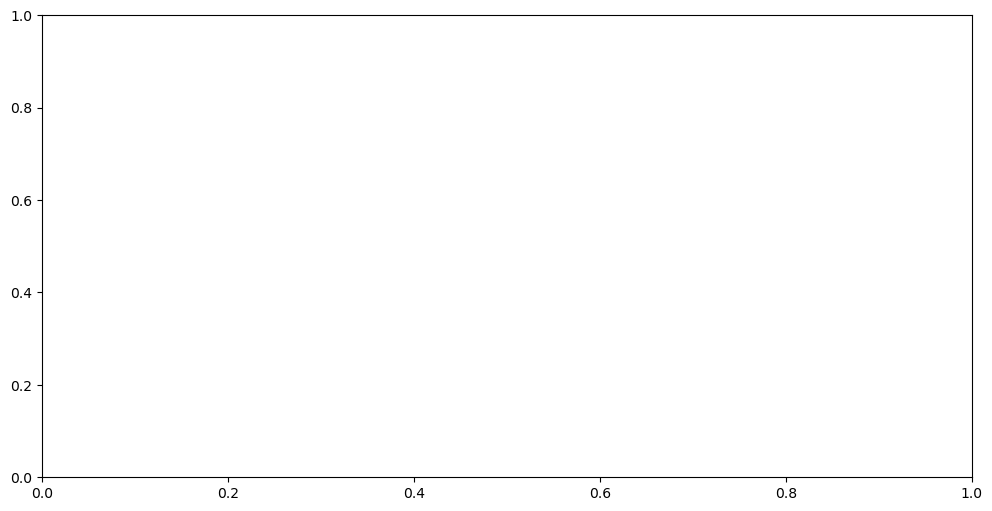

In [87]:
# Calculate covariance of a single portfolio
single_portfolio = 'SOROS FUND MANAGEMENT LLC'
# Calculate variance of S&P 500
covariance = combined_returns_df[single_portfolio].cov(combined_returns_df['S&P 500 Close'])
# Computing beta
sp500_variance = combined_returns_df['S&P 500 Close'].var()
beta = covariance / sp500_variance
# Plot beta trend
plt.figure(figsize=(12, 6))
plt.plot(combined_returns_df['Date'], beta, label=f'Beta for {single_portfolio}')
plt.ylabel('Beta')
plt.title(f'Beta Trend for {single_portfolio} vs. S&P 500')
plt.legend()
plt.show()

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend
